# Visualize x-ray data, use same dataloading strategy as assignment 1

In [20]:
import sys
sys.path.append('..')

In [33]:
from src import dataset
import importlib
importlib.reload(dataset)

<module 'src.dataset' from '/home/nashir/Documents/UCF/spring2023/cap5516/final-project/notebooks/../src/dataset.py'>

In [34]:
datadir = "../data/chest_xray"
dataloaders, dataset_sizes, class_names = dataset.load_xray_data(datadir)

In [35]:
import matplotlib.pyplot as plt
img = dataloaders['train'].dataset[0][0]

In [36]:
import numpy as np

In [37]:
np.unique(img[0] - img[1]), np.unique(img[0] - img[2]), np.unique(img[1] - img[2])

(array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32))

In [38]:
dataloaders, dataset_sizes, class_names = dataset.load_xray_data(datadir, load_as_rgb=False)

In [39]:
img = dataloaders['train'].dataset[0][0]
img.shape

torch.Size([1, 224, 224])

In [41]:
dataset_sizes

{'train': 4185, 'val': 1047, 'test': 624}

In [42]:
import torchvision
from src import viz

In [43]:
# Compute approximate mean and std of train dataset based on a single batch
images, _ = next(iter(dataloaders['train']))
# shape of images = [b,c,w,h]
mean, std = images.mean([0,2,3]), images.std([0,2,3])

In [44]:
## Reload dataset with mean and std for transforms
dataloaders, dataset_sizes, class_names = dataset.load_xray_data(datadir, dataset.get_baseline_transforms(mean, std))

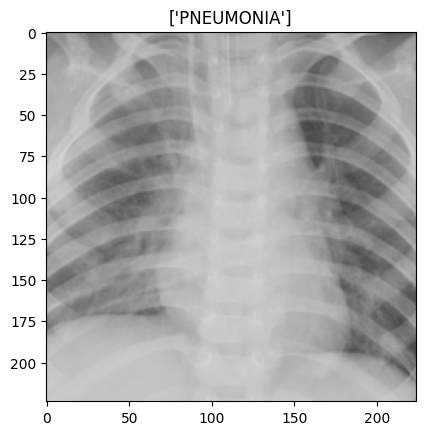

In [45]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['test']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

viz.imshow(out, mean, std, title=[class_names[x] for x in classes])


# Load downsampled version, 28x28

In [48]:
dataloaders, dataset_sizes, class_names = dataset.load_xray_data(datadir, dataset.get_downscale_transform(mean, std), batch_size=4, load_as_rgb=False)

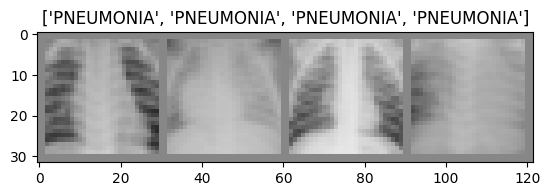

In [49]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['test']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

viz.imshow(out, mean, std, title=[class_names[x] for x in classes])
